In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('df2.csv')

In [3]:
df.head()

,ts,i_bat_raw,u_bat_raw,t_cells,ca_ch,ca_disch
0,0.000000,0.000000,2.020250,31.450912,0.0,0.0
1,0.002458,0.215949,2.032144,31.403294,0.0,0.0
2,0.002872,0.360018,2.044045,31.403294,0.0,0.0
3,0.003257,0.467245,2.055383,31.403294,0.0,0.0
4,0.003538,0.575633,2.068509,31.403294,0.0,0.0


In [4]:
df.shape

(1100, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         1100 non-null   float64
 1   i_bat_raw  1100 non-null   float64
 2   u_bat_raw  1100 non-null   float64
 3   t_cells    1100 non-null   float64
 4   ca_ch      1100 non-null   float64
 5   ca_disch   1100 non-null   float64
dtypes: float64(6)
memory usage: 51.7 KB


In [6]:
df.isnull().sum()

ts           0
i_bat_raw    0
u_bat_raw    0
t_cells      0
ca_ch        0
ca_disch     0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ts,1100.0,26.618938,17.348971,0.000000,10.644080,27.897664,42.580628,54.374342
i_bat_raw,1100.0,-0.109810,2.922244,-4.001405,-3.999720,0.076471,3.599094,3.601477
u_bat_raw,1100.0,3.115910,0.512314,1.997383,2.941449,3.369224,3.482470,3.600389
t_cells,1100.0,31.582715,1.636407,29.254869,30.182298,31.403294,32.444293,35.424797
ca_ch,1100.0,0.836496,0.369532,0.000000,0.702053,1.069149,1.075726,1.075726
ca_disch,1100.0,0.281413,0.423548,0.000000,0.000000,0.000000,0.602706,1.075913


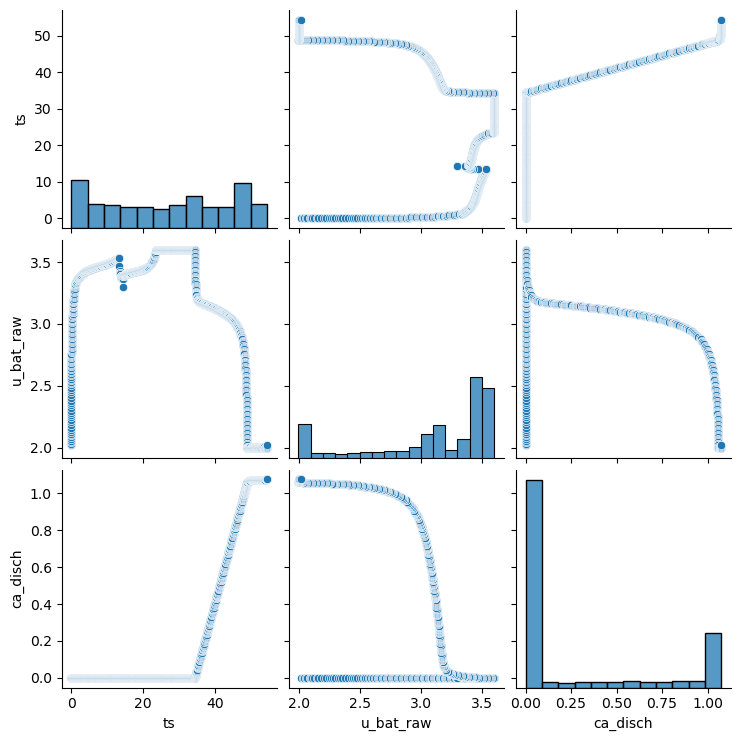

In [8]:
sns.pairplot(df[['ts','u_bat_raw','ca_disch']])

In [9]:
x = df.iloc[:,1:].values

In [10]:
x

array([[ 0.00000000e+00,  2.02025030e+00,  3.14509120e+01,
         0.00000000e+00,  0.00000000e+00],
       [ 2.15949145e-01,  2.03214360e+00,  3.14032940e+01,
         0.00000000e+00,  0.00000000e+00],
       [ 3.60018127e-01,  2.04404450e+00,  3.14032940e+01,
         0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.51050430e-02,  2.00150390e+00,  3.14220280e+01,
         1.07572600e+00,  1.07591260e+00],
       [-2.51050430e-02,  2.01157280e+00,  3.14220280e+01,
         1.07572600e+00,  1.07591260e+00],
       [ 0.00000000e+00,  2.01894660e+00,  3.14220280e+01,
         1.07572600e+00,  1.07591260e+00]])

In [11]:
y = df.iloc[:,0].values

In [12]:
y

array([0.00000000e+00, 2.45833300e-03, 2.87166700e-03, ...,
       5.43575650e+01, 5.43669383e+01, 5.43743417e+01])

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [14]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [15]:
reg.fit(x_train, y_train)

LinearRegression()

In [16]:
reg.score(x_train, y_train)

0.9882033432016616

In [17]:
reg.score(x_test, y_test)

0.9896356548702347

In [18]:
from sklearn.metrics import accuracy_score

## Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Apply PCA

In [20]:
# Apply PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = 3)

x_train_new = pca.fit_transform(x_train)
x_test_new = pca.transform(x_test)

In [21]:
print(x_train.shape)
print(x_train_new.shape)

(880, 5)
(880, 3)


In [22]:
pca.explained_variance_ratio_

array([0.57758725, 0.29347628, 0.071578  ])

In [23]:
reg.fit(x_train_new, y_train)

LinearRegression()

In [24]:
reg.score(x_train_new, y_train)

0.9423229904789037

In [25]:
reg.score(x_test_new, y_test)

0.9425720351983979

### For Loop for accuracy

In [26]:
accuracy = []

for i in range (1, 5):
    pca = PCA(n_components = i)
    x_tr = pca.fit_transform(x_train)
    x_te = pca.transform(x_test)
    
    reg.fit(x_tr, y_train)
    pred = reg.score(x_te, y_test)
    print(pred)
    accuracy.append(pred)

0.6947723818802879
0.9414371790703113
0.942572035198398
0.9693057303265201


In [27]:
reg.score(x_tr, y_train)

0.9717944053041417